In [1]:
# Importing and naming packages/libraries to be used
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Opening original .csv data set for manipulation
df = pd.read_csv("C:/Users/Owner/medical_clean.csv")

C1:  Data Cleaning Goals

In [3]:
# Check for duplicates, missing data, outliers

In [4]:
# Checking for duplicates
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [5]:
# Checking for missing data
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

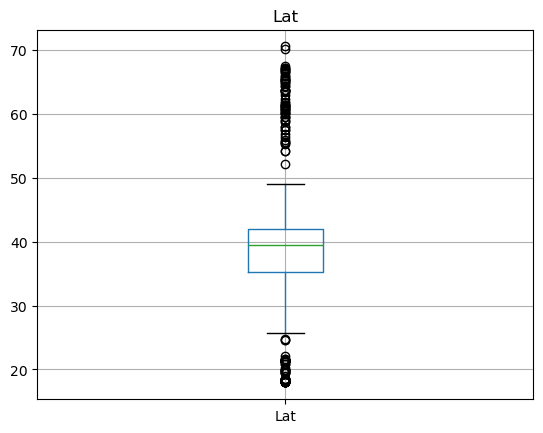

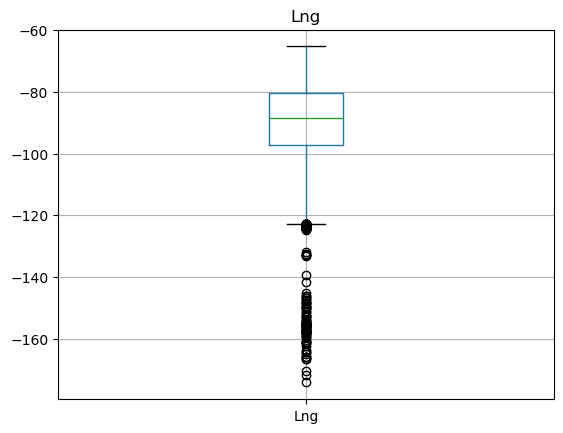

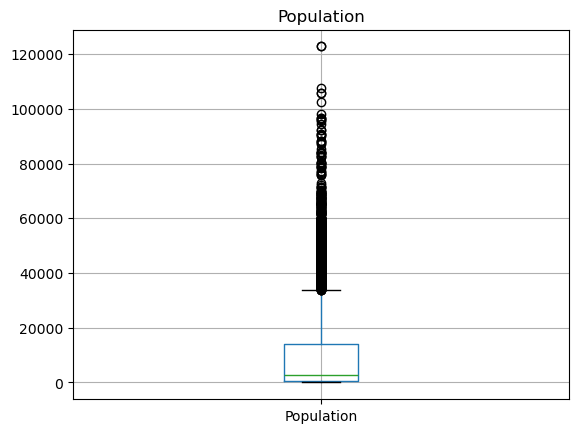

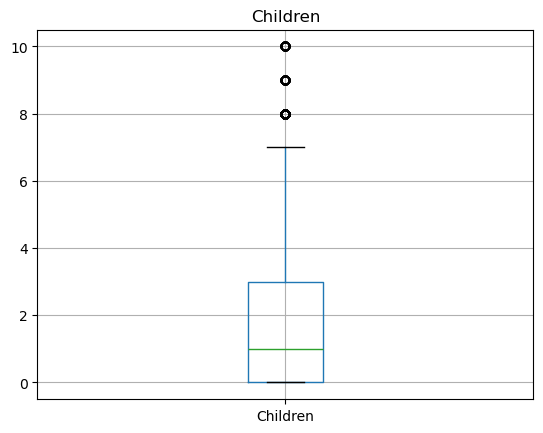

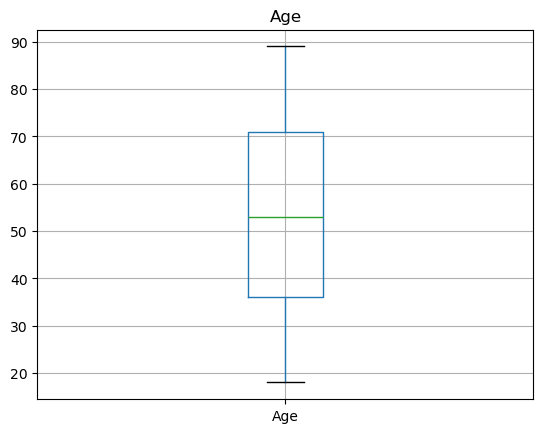

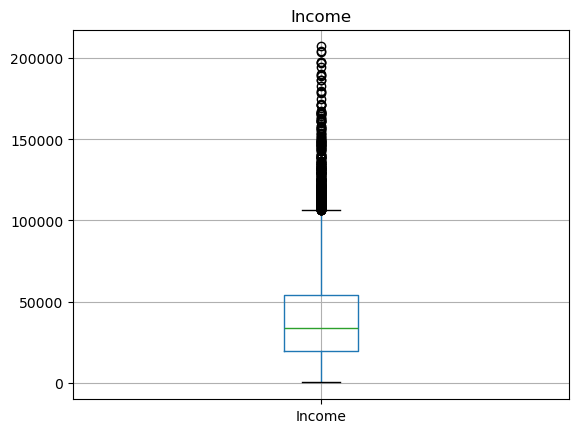

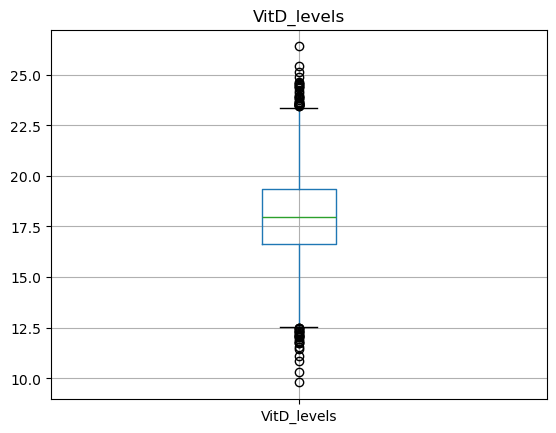

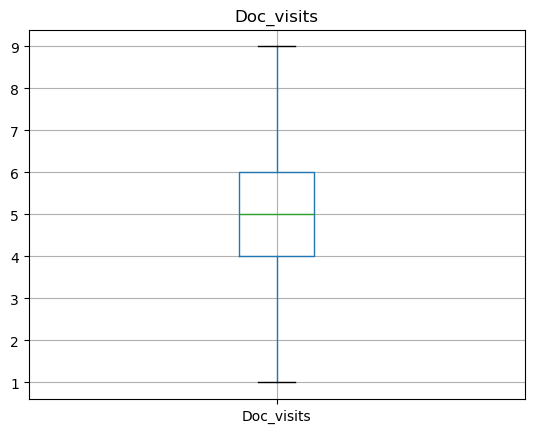

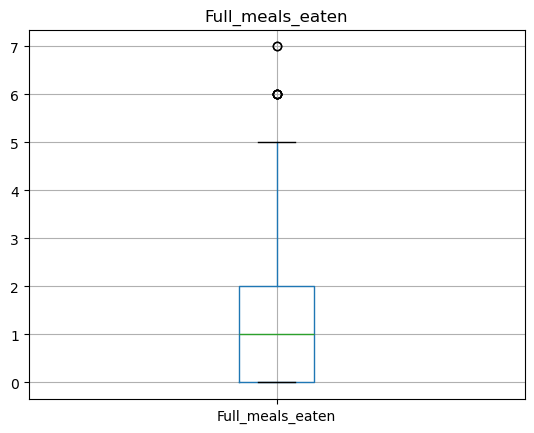

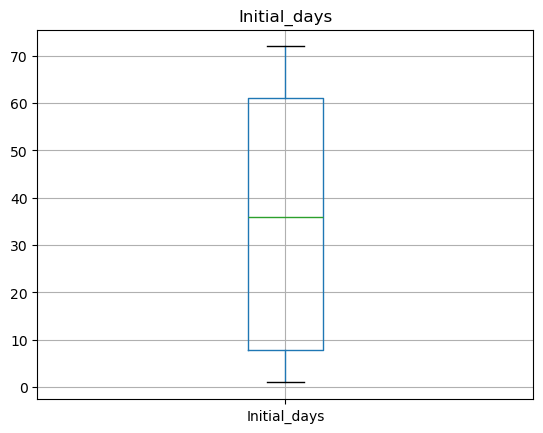

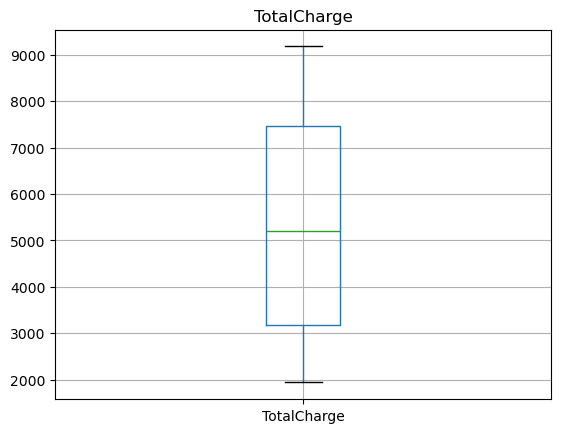

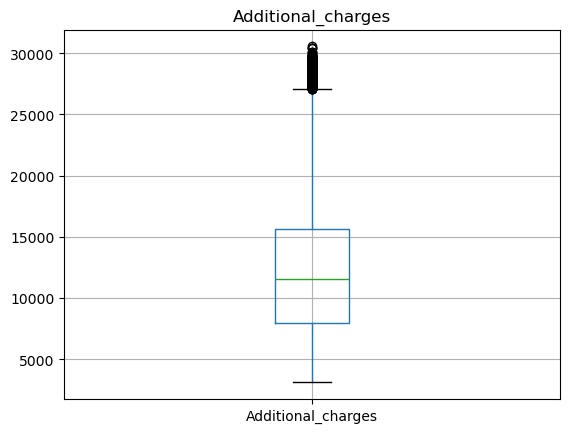

In [6]:
# Checking for outliers in quantitative variables

quant_columns = ['Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']


for column in df:
    if column in quant_columns:
        plt.figure()
        plt.gca().set_title(column)
        df.boxplot([column])

C2:  Summary Statistics

In [8]:
# Describe dependent and all independent variables

In [9]:
# Dependent categorical variable
df.ReAdmis.value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [10]:
# Independent variables

In [11]:
# Age
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [12]:
# Income
df.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

In [13]:
# VitD_levels
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [14]:
# Doc_visits
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [15]:
# Initial_admin
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [16]:
# HighBlood
df.HighBlood.value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [17]:
# Stroke
df.Stroke.value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [18]:
# Overweight
df.Overweight.value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [19]:
# Arthritis
df.Arthritis.value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [20]:
# Diabetes
df.Diabetes.value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [21]:
# Services
df.Services.value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [22]:
# Initial_days
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

C3:  Visualizations

In [24]:
# Univariates

Text(0, 0.5, 'Frequency')

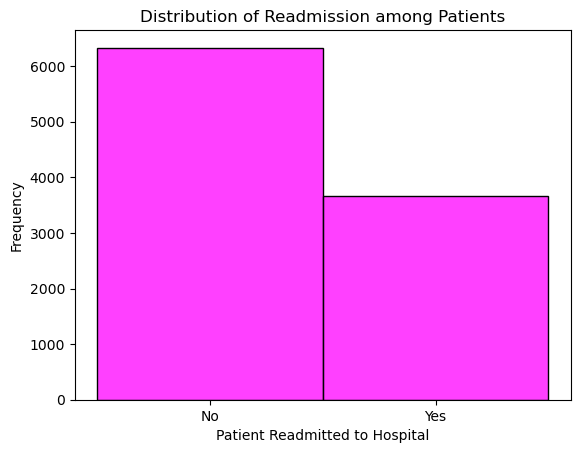

In [25]:
# Dependent variable ReAdmis
plt.title("Distribution of Readmission among Patients")
seaborn.histplot(data=df, x="ReAdmis", color="magenta", edgecolor="black")
plt.xlabel("Patient Readmitted to Hospital")
plt.ylabel("Frequency")

In [26]:
# Independent Variables

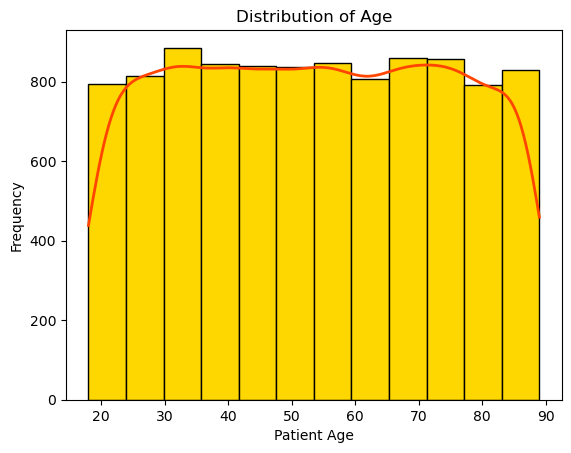

In [27]:
# Age
plt.title("Distribution of Age")
plt.ylabel("Frequency")
plt.xlabel("Patient Age")

seaborn.histplot(df['Age'], bins=12, color="orangered", kde=True, line_kws={'lw': 2}, facecolor='gold', edgecolor='black')
plt.show()

Text(0, 0.5, 'Frequency')

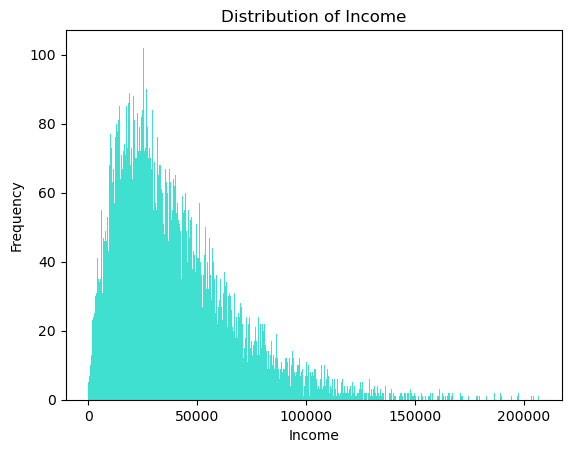

In [28]:
# Income
plt.title("Distribution of Income")
plt.hist(data=df, x="Income", bins=500, color="turquoise")
plt.xlabel("Income")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

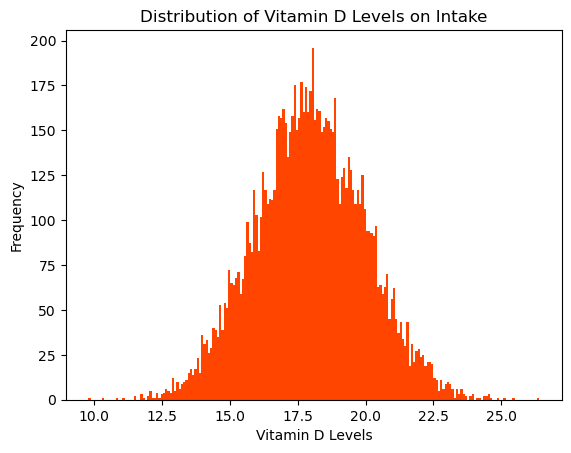

In [29]:
# VitD_levels
plt.title("Distribution of Vitamin D Levels on Intake")
plt.hist(data=df, x="VitD_levels", bins=200, color="orangered")
plt.xlabel("Vitamin D Levels")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

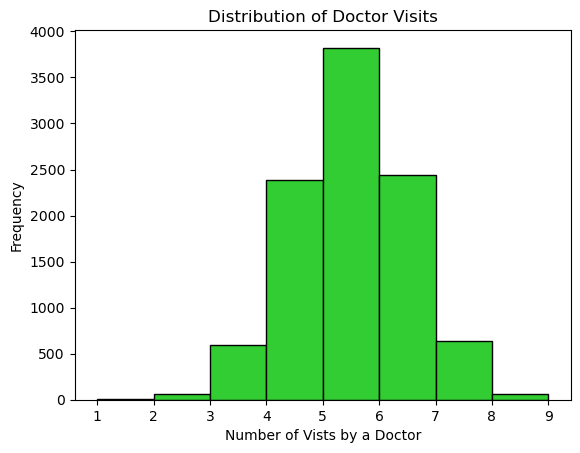

In [30]:
# Doc_visits
plt.title("Distribution of Doctor Visits")
plt.hist(data=df, x="Doc_visits", bins=8, color="limegreen", edgecolor="black")
plt.xlabel("Number of Vists by a Doctor")
plt.ylabel("Frequency")

([<matplotlib.patches.Wedge at 0x21f28593050>,
 [Text(-0.020921706571018026, -1.1098028123023282, 'Emergency Admission'),
  Text(-0.7537249339364316, 0.8148611685204553, 'Elective Admission'),
  Text(0.8005098780180698, 0.7689498912123567, 'Observation Admission')],
 [Text(-0.011497514421910805, -0.6098916355895676, '50.6%'),
  Text(-0.41420919792902994, 0.44780658810583573, '25.0%'),
  Text(0.439919842874795, 0.4225760663419257, '24.4%')])

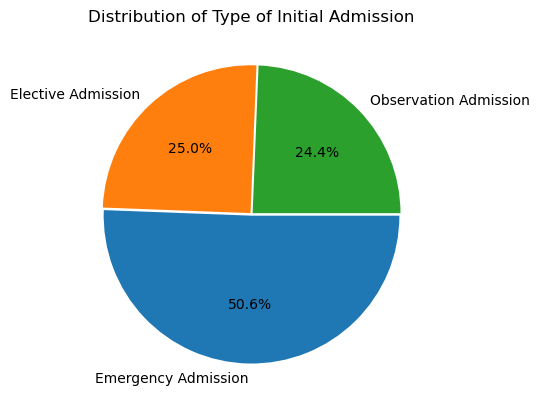

In [31]:
# Initial_admin
initial_admin_counts = df["Initial_admin"].value_counts()
initial_admin_labels = ["Emergency Admission", "Elective Admission", "Observation Admission"]
explode = [0.01, 0.01, 0.01]

plt.title("Distribution of Type of Initial Admission")
plt.pie(initial_admin_counts, labels=initial_admin_labels, explode=explode, autopct='%.01f%%', counterclock=False)


([<matplotlib.patches.Wedge at 0x21f287e73d0>,
 [Text(-0.310207301470972, 1.0553536990573813, 'Yes'),
  Text(0.31020740028031507, -1.055353670013673, 'No')],
 [Text(-0.16920398262053013, 0.575647472213117, '59.1%'),
  Text(0.16920403651653546, -0.5756474563710943, '40.9%')])

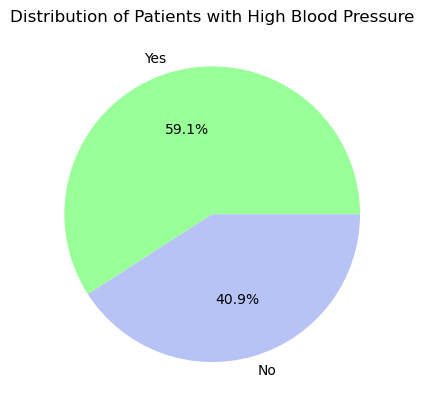

In [32]:
# HighBlood
highblood_counts = df["HighBlood"].value_counts()
highblood_labels = ["Yes", "No"]
colors = ['#99FF99', '#B7C3F5'] 

plt.title("Distribution of Patients with High Blood Pressure")
plt.pie(highblood_counts, labels=highblood_labels, colors=colors, autopct='%.01f%%')

Text(0, 0.5, 'Frequency')

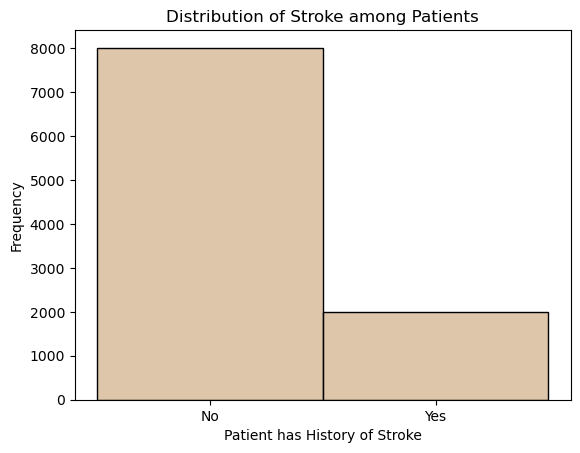

In [33]:
# Stroke
plt.title("Distribution of Stroke among Patients")
seaborn.histplot(data=df, x="Stroke", color="tan", edgecolor="black")
plt.xlabel("Patient has History of Stroke")
plt.ylabel("Frequency")

([<matplotlib.patches.Wedge at 0x21f26f878d0>,
 [Text(-0.6725582094819338, 0.8704398054193382, 'Yes'),
  Text(0.6725582094819337, -0.8704398054193383, 'No')],
 [Text(-0.36684993244469116, 0.47478534841054804, '70.9%'),
  Text(0.36684993244469105, -0.4747853484105481, '29.1%')])

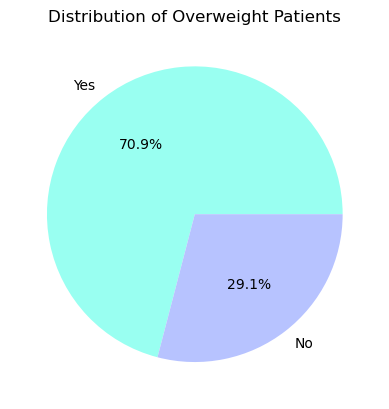

In [34]:
# Overweight
overweight_counts = df["Overweight"].value_counts()
overweight_labels = ["Yes", "No"]
colors = ['#99FFF1', '#B7C3FF'] 

plt.title("Distribution of Overweight Patients")
plt.pie(overweight_counts, labels=overweight_labels, colors=colors, autopct='%.01f%%')

Text(0, 0.5, 'Frequency')

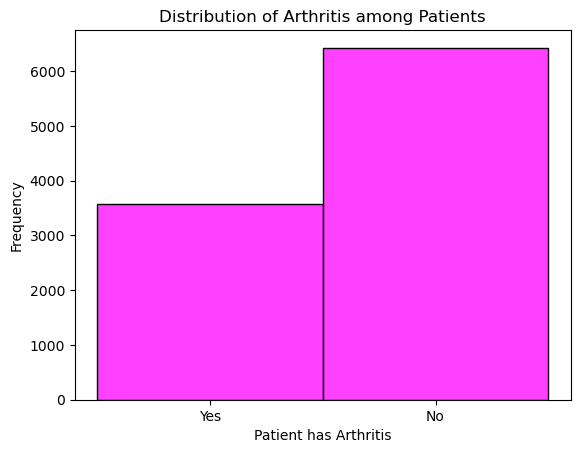

In [35]:
# Arthritis
plt.title("Distribution of Arthritis among Patients")
seaborn.histplot(data=df, x="Arthritis", color='magenta', edgecolor="black")
plt.xlabel("Patient has Arthritis")
plt.ylabel("Frequency")

([<matplotlib.patches.Wedge at 0x21f27112350>,
 [Text(-0.7175410579249271, 0.8337474618803806, 'Yes'),
  Text(0.7175409798638528, -0.8337475290614194, 'No')],
 [Text(-0.3913860315954147, 0.4547713428438439, '72.6%'),
  Text(0.39138598901664695, -0.45477137948804686, '27.4%')])

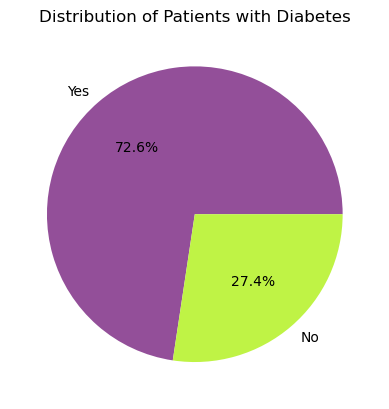

In [36]:
# Diabetes
diabetes_counts = df["Diabetes"].value_counts()
diabetes_labels = ["Yes", "No"]
colors = ['#934F99', '#BFF345'] 

plt.title("Distribution of Patients with Diabetes")
plt.pie(diabetes_counts, labels=diabetes_labels, colors=colors, autopct='%.01f%%')

Text(0, 0.5, 'Service Provided')

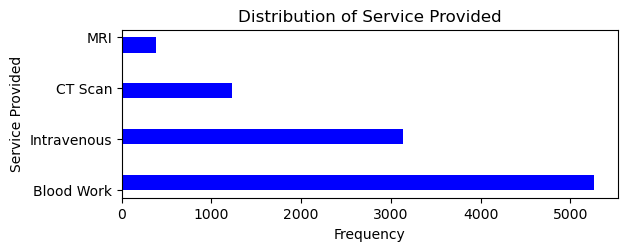

In [37]:
# Services
plt.subplot(2,1,1)
plt.title("Distribution of Service Provided")
plt.hist(data=df, x="Services", orientation="horizontal", color="blue")
plt.xlabel("Frequency")
plt.ylabel("Service Provided")

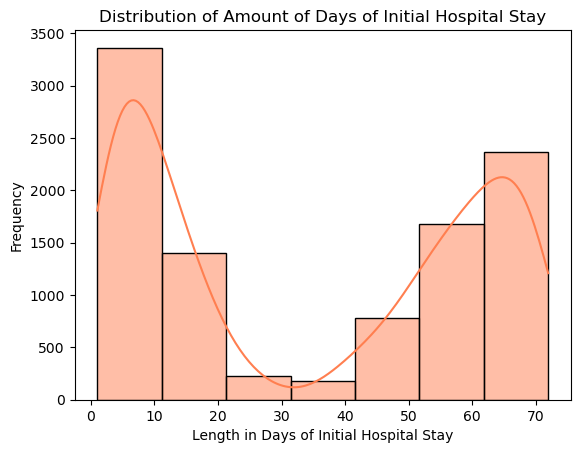

In [38]:
# Initial_days
plt.title("Distribution of Amount of Days of Initial Hospital Stay")
plt.ylabel("Frequency")
plt.xlabel("Length in Days of Initial Hospital Stay")
seaborn.histplot(df['Initial_days'], bins=7, color="coral", edgecolor="black", kde=True)
plt.show()

In [39]:
# Bivariate Analyses (all independent w/ ReAdmis)

Text(0, 0.5, 'Age')

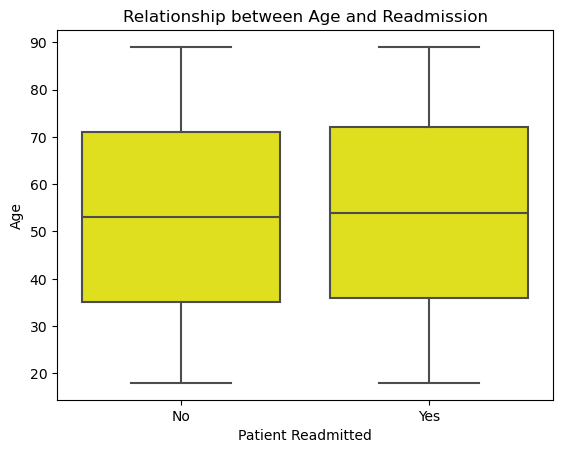

In [40]:
# Age
plt.title("Relationship between Age and Readmission")
seaborn.boxplot(data=df, x="ReAdmis", y="Age", color="yellow")
plt.xlabel("Patient Readmitted")
plt.ylabel("Age")

Text(0, 0.5, 'Income')

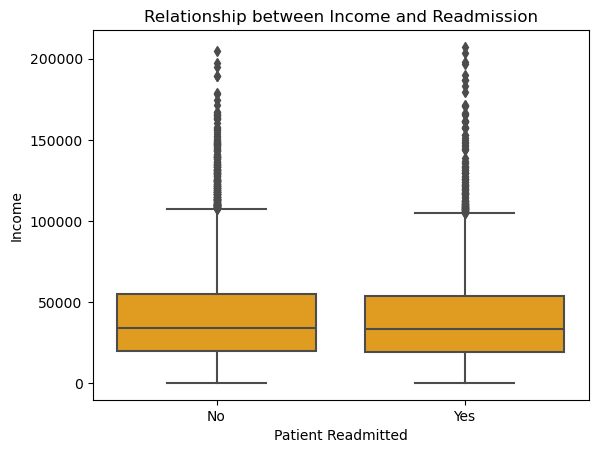

In [41]:
# Income
plt.title("Relationship between Income and Readmission")
seaborn.boxplot(data=df, x="ReAdmis", y="Income", color="orange")
plt.xlabel("Patient Readmitted")
plt.ylabel("Income")

Text(0, 0.5, 'Vitamin D levels')

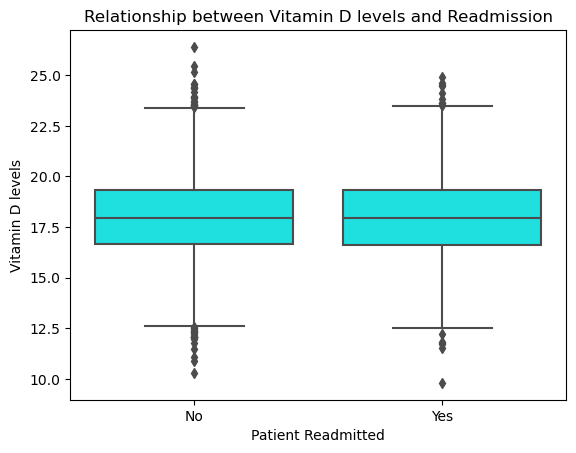

In [42]:
# VitD_levels
plt.title("Relationship between Vitamin D levels and Readmission")
seaborn.boxplot(data=df, x="ReAdmis", y="VitD_levels", color="cyan")
plt.xlabel("Patient Readmitted")
plt.ylabel("Vitamin D levels")

Text(0, 0.5, 'Number of Doctor Visits')

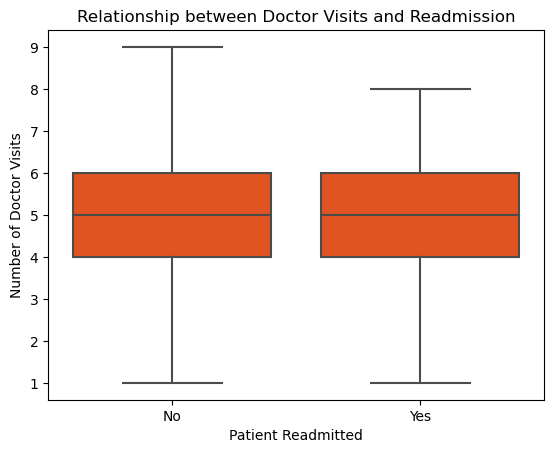

In [43]:
# Doc_visits
plt.title("Relationship between Doctor Visits and Readmission")
seaborn.boxplot(data=df, x="ReAdmis", y="Doc_visits", color="orangered")
plt.xlabel("Patient Readmitted")
plt.ylabel("Number of Doctor Visits")

Text(0.5, 0, 'Patient Readmitted')

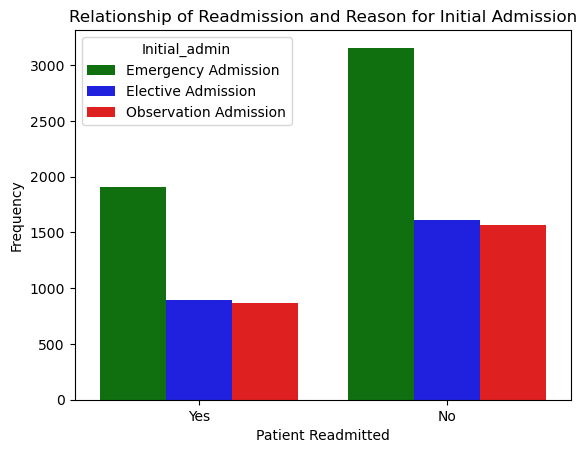

In [44]:
# Initial_admin
ax = seaborn.countplot(data=df, x='ReAdmis', hue='Initial_admin', order=['Yes', 'No'], hue_order=['Emergency Admission', 'Elective Admission', 'Observation Admission'], palette={'Emergency Admission': 'green', 'Elective Admission':'blue', 'Observation Admission':'Red'})
plt.title("Relationship of Readmission and Reason for Initial Admission")
plt.ylabel("Frequency")
plt.xlabel("Patient Readmitted")

Text(0.5, 0, 'Patient Readmitted')

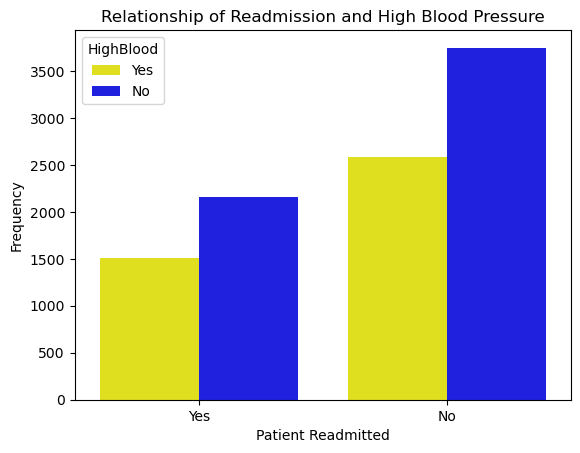

In [45]:
# HighBlood
ax = seaborn.countplot(data=df, x='ReAdmis', hue='HighBlood', order=['Yes', 'No'], hue_order=['Yes', 'No'], palette={'Yes': 'yellow', 'No':'blue'})
plt.title("Relationship of Readmission and High Blood Pressure")
plt.ylabel("Frequency")
plt.xlabel("Patient Readmitted")

Text(0.5, 0, 'Patient Readmitted')

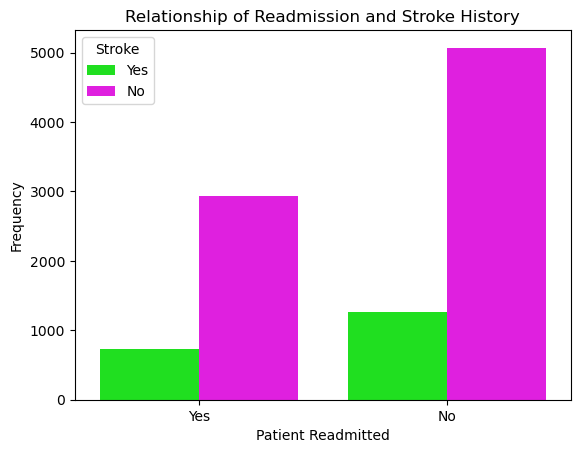

In [46]:
# Stroke
ax = seaborn.countplot(data=df, x='ReAdmis', hue='Stroke', order=['Yes', 'No'], hue_order=['Yes', 'No'], palette={'Yes': 'lime', 'No':'magenta'})
plt.title("Relationship of Readmission and Stroke History")
plt.ylabel("Frequency")
plt.xlabel("Patient Readmitted")

Text(0.5, 0, 'Patient Readmitted')

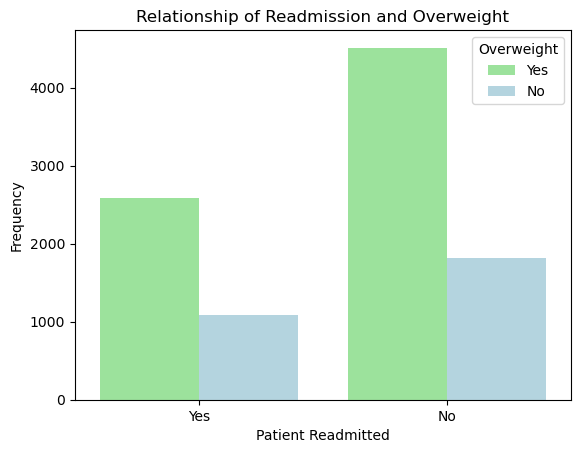

In [47]:
# Overweight
ax = seaborn.countplot(data=df, x='ReAdmis', hue='Overweight', order=['Yes', 'No'], hue_order=['Yes', 'No'], palette={'Yes': 'lightgreen', 'No':'lightblue'})
plt.title("Relationship of Readmission and Overweight")
plt.ylabel("Frequency")
plt.xlabel("Patient Readmitted")

Text(0.5, 0, 'Patient Readmitted')

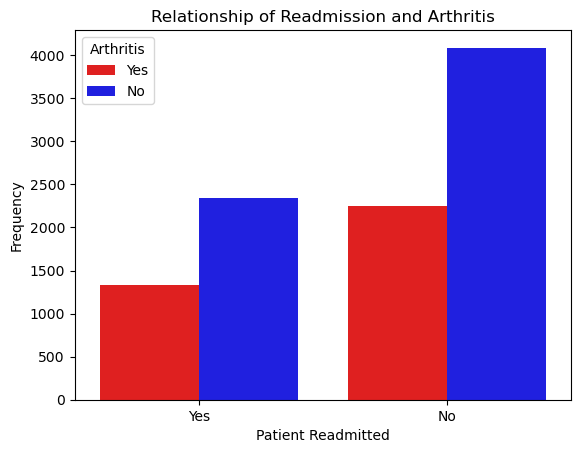

In [48]:
# Arthritis
ax = seaborn.countplot(data=df, x='ReAdmis', hue='Arthritis', order=['Yes', 'No'], hue_order=['Yes', 'No'], palette={'Yes': 'red', 'No':'blue'})
plt.title("Relationship of Readmission and Arthritis")
plt.ylabel("Frequency")
plt.xlabel("Patient Readmitted")

Text(0.5, 0, 'Patient Readmitted')

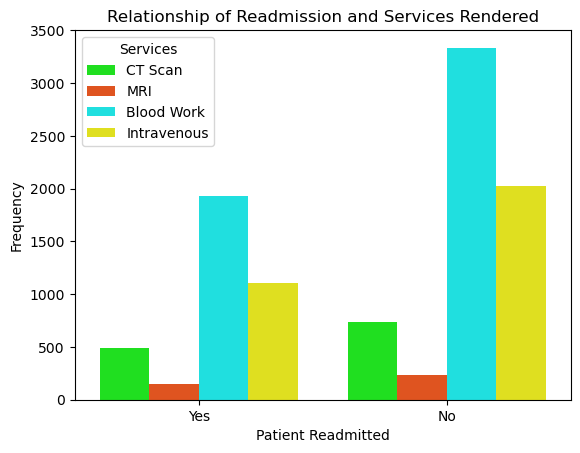

In [49]:
# Services
ax = seaborn.countplot(data=df, x='ReAdmis', hue='Services', order=['Yes', 'No'], hue_order=['CT Scan', 'MRI', 'Blood Work', 'Intravenous'], palette={'CT Scan': 'lime', 'MRI':'orangered', 'Blood Work':'cyan', 'Intravenous':'yellow'})
plt.title("Relationship of Readmission and Services Rendered")
plt.ylabel("Frequency")
plt.xlabel("Patient Readmitted")

Text(0, 0.5, 'Days of Initial Hospital Stay')

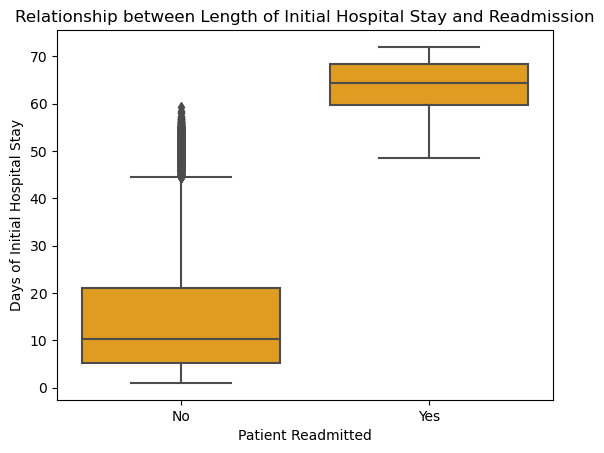

In [50]:
# Initial_days
plt.title("Relationship between Length of Initial Hospital Stay and Readmission")
seaborn.boxplot(data=df, x="ReAdmis", y="Initial_days", color="orange")
plt.xlabel("Patient Readmitted")
plt.ylabel("Days of Initial Hospital Stay")

C4:  Data Transformation

In [52]:
# Remove outliers
# Change booleans/categoricals into numbers
# Create dummy variables and drop regular columns

In [53]:
# Remove outliers (> {Mean + 2*std})

In [54]:
df['Initial_days'] = df.Initial_days.round(1)

In [55]:
# Setting Income outliers to NAs
df['Income'] = np.where(df['Income'] > 97532.79, np.nan, df['Income'])

# Setting Income NaN outliers to Median value
df['Income'].fillna(df['Income'].median(), inplace=True)



In [56]:
# Setting values to 2 decimal places to better represent income
df['Income'] = df.Income.round(2)

In [57]:
# VitD_levels outliers
df['VitD_levels'] = np.where(df['VitD_levels'] > 21.99, np.nan, df['VitD_levels'])
df['VitD_levels'].fillna(df['VitD_levels'].median(), inplace=True)


In [58]:
# Reexpress booleans/categoricals into numeric values

In [59]:
df['ReAdmis'] = df['ReAdmis'].map({'Yes': '1', 'No': '0'})

In [60]:
df['HighBlood'] = df['HighBlood'].map({'Yes': '1', 'No': '0'})

In [61]:
df['Stroke'] = df['Stroke'].map({'Yes': '1', 'No': '0'})


In [62]:
df['Overweight'] = df['Overweight'].map({'Yes': '1', 'No': '0'})

In [63]:
df['Arthritis'] = df['Arthritis'].map({'Yes': '1', 'No': '0'})

In [64]:
df['Diabetes'] = df['Diabetes'].map({'Yes': '1', 'No': '0'})

In [65]:
# Create dummy variables and adding to dataframe

In [66]:
# Initial_admin dummies
initial_admin_dummies = pd.get_dummies(df.Initial_admin, columns=['Elective Admission', 'Emergency Admission'])

In [67]:
df.insert(25, 'Initial_admin_elective_admission', initial_admin_dummies['Elective Admission'])

In [68]:
df.insert(25, 'Initial_admin_emergency_admission', initial_admin_dummies['Emergency Admission'])

In [69]:
# Services dummies
services_dummies = pd.get_dummies(df.Services, columns=['Blood Work', 'Intravenous', 'CT Scan'])
                    

In [70]:
df.insert(41, 'Services_blood_work', services_dummies['Blood Work'])

In [71]:
df.insert(41, 'Services_intravenous', services_dummies['Intravenous'])

In [72]:
df.insert(41, 'Services_ct_scan', services_dummies['CT Scan'])

In [73]:
# Map dummies to numerical values

In [74]:
df['Initial_admin_elective_admission'] = df['Initial_admin_elective_admission'].astype(int)

In [75]:
df['Initial_admin_emergency_admission'] = df['Initial_admin_emergency_admission'].astype(int)

In [76]:
df['Services_blood_work'] = df['Services_blood_work'].astype(int)

In [77]:
df['Services_intravenous'] = df['Services_intravenous'].astype(int)

In [78]:
df['Services_ct_scan'] = df['Services_ct_scan'].astype(int)

In [79]:
# Drop unneeded columns

In [80]:
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Marital', 'Gender', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'Complication_risk', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)


C5:  Prepared Data Set

In [82]:
# Create .csv
df.to_csv('cleanlogisticdata.csv', index=False)


D1:  Initial Model

In [84]:
# Create model
df = pd.read_csv("C:/Users/Owner/cleanlogisticdata.csv")

In [85]:
# Define independent variables to be used for initial model
X = df[['Age', 'Income', 'VitD_levels', 'Doc_visits', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Services_blood_work', 'Services_intravenous', 'Services_ct_scan', 'Initial_days']].assign(const=1)


In [86]:
# (Logistic Regression Using Statsmodels, 2020) 
# INITIAL MODEL
y = df.ReAdmis.astype(int)
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.038633
         Iterations 13


In [87]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.9412
Time:                        23:04:20   Log-Likelihood:                -386.33
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0005      0.005     -0.103      0.918      -0.009       0.008
Income                            -3.045e-06   4.16e-06     -0

In [88]:
# AIC for initial model
aic_initial = log_reg.aic
print("AIC: ", aic_initial)

AIC:  804.660177547433


In [89]:
# Predictions
yhat = log_reg.predict(X)
prediction = list(map(round, yhat))

# confusion matrix
cm = confusion_matrix(y, prediction)
print("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[6247   84]
 [  85 3584]]


In [90]:
# Accuracy
acc = accuracy_score(y, prediction)
print("Accuracy :", acc)

Accuracy : 0.9831


In [91]:
# VIFs 
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,1.001453,Age
1,1.001734,Income
2,1.002787,VitD_levels
3,1.001566,Doc_visits
4,1.523043,Initial_admin_emergency_admission
5,1.522151,Initial_admin_elective_admission
6,1.001392,HighBlood
7,1.001230,Stroke
8,1.001488,Overweight
9,1.000935,Arthritis


D2:  Justification of Model Reduction

In [93]:
# Reduction 1: Age
X = df[['Income', 'VitD_levels', 'Doc_visits', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Services_blood_work', 'Services_intravenous', 'Services_ct_scan', 'Initial_days']].assign(const=1)
y = df.ReAdmis

log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())




Optimization terminated successfully.
         Current function value: 0.038634
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.9412
Time:                        23:04:20   Log-Likelihood:                -386.34
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Income                            -3.018e-06   4.16e-06     -

In [94]:
# Reduction 2: Doc_visits
X = df[['Income', 'VitD_levels', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Services_blood_work', 'Services_intravenous', 'Services_ct_scan', 'Initial_days']].assign(const=1)
y = df.ReAdmis

log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.038635
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.9412
Time:                        23:04:21   Log-Likelihood:                -386.35
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Income                            -3.006e-06   4.15e-06     -

In [95]:
# Reduction 3: Income
X = df[['VitD_levels', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Services_blood_work', 'Services_intravenous', 'Services_ct_scan', 'Initial_days']].assign(const=1)
y = df.ReAdmis

log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.038661
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.9412
Time:                        23:04:21   Log-Likelihood:                -386.61
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
VitD_levels                           0.0541      0.050      

In [96]:
# Reduction 4: Overweight
X = df[['VitD_levels', 'Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Services_blood_work', 'Services_intravenous', 'Services_ct_scan', 'Initial_days']].assign(const=1)
y = df.ReAdmis

log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.038691
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.9411
Time:                        23:04:21   Log-Likelihood:                -386.91
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
VitD_levels                           0.0534      0.050      

In [97]:
# Reduction 5: VitD_levels
X = df[['Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Services_blood_work', 'Services_intravenous', 'Services_ct_scan', 'Initial_days']].assign(const=1)
y = df.ReAdmis

log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.038750
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.9410
Time:                        23:04:21   Log-Likelihood:                -387.50
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Initial_admin_emergency_admission     1.4141      0.236      

In [98]:
# Reduction 6: Diabetes
X = df[['Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'HighBlood', 'Stroke', 'Arthritis', 'Services_blood_work', 'Services_intravenous', 'Services_ct_scan', 'Initial_days']].assign(const=1)
y = df.ReAdmis

log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.038941
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.9408
Time:                        23:04:21   Log-Likelihood:                -389.41
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Initial_admin_emergency_admission     1.4241      0.236      

In [99]:
# Reduction 7: Services_ct_scan
X = df[['Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'HighBlood', 'Stroke', 'Arthritis', 'Services_blood_work', 'Services_intravenous', 'Initial_days']].assign(const=1)
y = df.ReAdmis

log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.039130
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.9405
Time:                        23:04:21   Log-Likelihood:                -391.30
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Initial_admin_emergency_admission     1.4179      0.235      

D3:  Reduced Logistic Regression Model

In [101]:
# Reduced model 
X = df[['Initial_admin_emergency_admission', 'Initial_admin_elective_admission', 'HighBlood', 'Stroke', 'Arthritis', 'Services_blood_work', 'Services_intravenous', 'Initial_days']].assign(const=1)
y = df.ReAdmis

log_reg_reduced = sm.Logit(y, X).fit()
print(log_reg_reduced.summary())

Optimization terminated successfully.
         Current function value: 0.039130
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.9405
Time:                        23:04:21   Log-Likelihood:                -391.30
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Initial_admin_emergency_admission     1.4179      0.235      

E1:  Model Comparison

In [103]:
# AIC for reduced model
aic_reduced = log_reg_reduced.aic
print("AIC: ", aic_reduced)

AIC:  800.5979177927082


E2:  Logistic Regression

In [105]:
# Confusion matrix and accuracy

In [106]:
# Predictions
yhat = log_reg_reduced.predict(X)
prediction = list(map(round, yhat))

# Confusion matrix
cm = confusion_matrix(y, prediction)
print("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[6244   87]
 [  84 3585]]


In [107]:
# Accuracy
acc = accuracy_score(y, prediction)
print("Accuracy :", acc*100, "%")

Accuracy : 98.29 %
